<a href="https://colab.research.google.com/github/paulosalvatore/Ocean_DeepLearning_24_11_2020/blob/main/Ocean_DeepLearning_24_11_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist # Base de dados MNIST
from tensorflow.python.keras import Sequential # Modelo da nossa rede neural
from tensorflow.python.keras.layers import Dense, Dropout # Neurônios (base da rede) e Regularizador (evita overfitting)
from tensorflow.compat.v1.keras.optimizers import RMSprop # Otimizador (back propagation)

In [2]:
# Carregando os dados de treino e teste

(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

In [3]:
print("Quantidade de imagens para treino:", len(x_treino))

print("Quantidade de imagens para teste:", len(x_teste))

print("Tipo de x_treino:", type(x_treino))

primeira_imagem = x_treino[0]

representacao_primeira_imagem = y_treino[0]
print("O que a imagem 0 representa:", representacao_primeira_imagem)

print("Formato da primeira imagem:", primeira_imagem.shape, type(primeira_imagem.shape))

print(primeira_imagem)

Quantidade de imagens para treino: 60000
Quantidade de imagens para teste: 10000
Tipo de x_treino: <class 'numpy.ndarray'>
O que a imagem 0 representa: 5
Formato da primeira imagem: (28, 28) <class 'tuple'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242

Essa imagem representa: 7


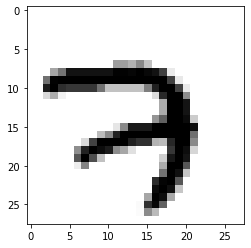

In [4]:
import matplotlib.pyplot as plt

"""
for indice in range(60000):
  print("Essa imagem representa:", y_treino[indice])
  plt.imshow(x_treino[indice], cmap=plt.cm.binary)
  plt.show()
"""

indice = 5000

print("Essa imagem representa:", y_treino[indice])
plt.imshow(x_treino[indice], cmap=plt.cm.binary)
plt.show()

In [5]:
# Fluxo para construção da rede neural
# - Organizar camada de entrada (input)
# - Organizar camada de saída (output)
# - Estruturar a nossa rede neural
# - Treinar o modelo
# - Fazer as previsões

In [6]:
# Achatando a matriz de pixels e transformando em uma única lista

quantidade_treino = len(x_treino) # 60000
quantidade_teste = len(x_teste) # 10000

resolucao_imagem = x_treino[0].shape # (28, 28)
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1] # 28 * 28 = 784

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

In [7]:
print("Quantidade de itens em x_treino[0]:", len(x_treino[0]))

# Como ficou x_treino[0]?
print(x_treino[0])

Quantidade de itens em x_treino[0]: 784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 25

In [8]:
# Normalização dos dados

# 255 vira 1
# 127 vira 0.5
# 0 vira 0
# E assim por diante

# Precisamos garantir que o valor máximo de entrada é 1
# Como atualmente a imagem fornece um valor máximo de 255, precisamos normalizá-los

x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

x_treino /= 255
x_teste /= 255

print(x_treino[0][350], type(x_treino[0][350]))

0.27450982 <class 'numpy.float32'>


In [9]:
# Visualizando os dados normalizados

print("Dados normalizados:", x_treino[0])

Dados normalizados: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.

In [12]:
# Preparação da camada de saída (output)

valores_unicos = set(y_treino) # {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
print(valores_unicos)

quantidade_valores_unicos = len(valores_unicos) # 10
print(quantidade_valores_unicos)

# Transformar os valores únicos em variáveis categóricas
# Número 0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# Número 1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# ...
# Número 9 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

print("y_treino[0] antes:", y_treino[0])

y_treino = keras.utils.to_categorical(y_treino, quantidade_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, quantidade_valores_unicos)

print("y_treino[0] depois:", y_treino[0])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
10
y_treino[0] antes: 5
y_treino[0] depois: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
# Criando o modelo da rede neural

model = Sequential()

# Primeira hidden layer
# 30 neurônios
# Função de ativação: ReLU
# Como estamos na primeira hidden layer, precisamos informar o formato da camada de entrada (input)

model.add(Dense(30, activation='relu', input_shape=(resolucao_total,)))

# Adicionamos um regularizador, que ajuda a evitar o overfitting
# No caso, será o Dropout
model.add(Dropout(0.2))

# Segunda hidden layer
# 20 neurônios
# Função de ativação: ReLU
model.add(Dense(20, activation='relu'))

# Mais um regularizador depois da segunda hidden layer
model.add(Dropout(0.2))

# Finalizamos com a camada de saída (output), informando a quantidade de valores únicos, que no caso é 10
model.add(Dense(quantidade_valores_unicos, activation='softmax'))

# Exibe o resumo do modelo criado
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compila o modelo

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [16]:
# Treina o modelo

history = model.fit(x_treino, y_treino,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_teste, y_teste))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.8441 - accuracy: 0.7356 - val_loss: 0.2929 - val_accuracy: 0.9183
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4511 - accuracy: 0.8653 - val_loss: 0.2312 - val_accuracy: 0.9334
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3789 - accuracy: 0.8879 - val_loss: 0.2071 - val_accuracy: 0.9387
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3462 - accuracy: 0.8977 - val_loss: 0.1959 - val_accuracy: 0.9407
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3305 - accuracy: 0.9038 - val_loss: 0.1889 - val_accuracy: 0.9433
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3126 - accuracy: 0.9080 - val_loss: 0.1803 - val_accuracy: 0.9463
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2974 - accuracy: 0.9120 - val_loss: 0.1700 - val_accuracy: 0.9504
Epoch 

Valor categórico em y_teste[indice]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Previsão: [[2.3977978e-05 2.1811927e-07 6.0842826e-04 1.7403845e-08 6.5760687e-05
  4.5828612e-05 9.9920928e-01 1.2604046e-07 4.6288766e-05 2.3100928e-09]]
Previsão ajustada: [6]


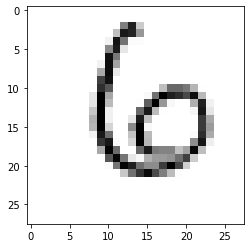

In [24]:
# Fazendo nossas previsões

indice = 100

print("Valor categórico em y_teste[indice]:", y_teste[indice])

# Preparar a imagem para fazer a previsão
imagem = x_teste[indice].reshape((1, resolucao_total))

prediction = model.predict(imagem)
print("Previsão:", prediction)

# Transformar a previsão em algo que conseguimos entender

import numpy as np
prediction_class = np.argmax(prediction, axis=-1)
print("Previsão ajustada:", prediction_class)

# Apenas para visualizar a imagem
(x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
plt.imshow(x_teste_img[indice], cmap=plt.cm.binary)